In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# sklearn has 100s of models - grouped in sublibraries, such as linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

# sklearn has many tools for cleaning/processing data, also grouped in sublibraries
# splitting one dataset into train and test, computing cross validation score, cross validated prediction
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

#sklearn modules for computing the performance metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score
#from pyearth import Earth
from sklearn.linear_model import LinearRegression,LogisticRegression

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as tm

#Library to compute pair-wise Euclidean distance between all observations in the data
from sklearn import metrics

#Library to impute missing values with the KNN algorithm
from sklearn import impute

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_val_score,train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px
from sklearn.impute import KNNImputer
import xgboost as xgb

from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

In [2]:
from pyearth import Earth

In [3]:
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
imputer = KNNImputer(n_neighbors=5)
imp = imputer.fit_transform(df)
df = pd.DataFrame(imp, columns = df.columns)

In [6]:
# Separating the predictors and response - THIS IS HOW ALL SKLEARN OBJECTS ACCEPT DATA (different from statsmodels)
y = df.Potability
X = df.drop("Potability", axis = 1)

y_copy= y.copy()
X_copy= X.copy()

In [7]:
# Creating training and test data
    # 80-20 split, which is usual - 70-30 split is also fine, 90-10 is fine if the dataset is large
    # random_state to set a random seed for the splitting - reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [8]:
# With linear/logistic regression in scikit-learn, especially when the predictors have different orders 
# of magn., scaling is necessary. This is to enable the training algo. which we did not cover. (Gradient Descent)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # Do NOT refit the scaler with the test data, just transform it.

In [9]:
X_train_og = X_train.copy()
X_test_og = X_test.copy()

X_train = X_train_scaled
X_test = X_test_scaled

# AdaBoost Model

In [17]:
model_Ada = AdaBoostClassifier(random_state=1,estimator = DecisionTreeClassifier(max_depth=10),learning_rate=1,
                          n_estimators=1000).fit(X_train,y_train)

### XGB

In [11]:
model_XGB = xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,gamma=1,learning_rate = .001,max_depth=8,
                              n_estimators = 100,reg_lambda = 1,scale_pos_weight=1.589, subsample = 0.5, colsample_by_tree = 0.25, n_jobs = -1)
model_XGB.fit(X_train,y_train)

[01:42:49] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_by_tree" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by_tree=0.25, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)

### Random Forest Model Tuning

In [12]:
model_randomForest = RandomForestClassifier(random_state=1, max_features=4, n_estimators = 100, 
                               oob_score=True, max_depth =12, max_leaf_nodes = 36).fit(X_train, y_train)

### Bagged Decision Tree

In [13]:
model_BaggedTree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, random_state=1,
                        n_jobs=-1).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Gradient Boosting 

In [14]:
model_GradBoost = GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.005,subsample=0.65,
                          n_estimators=60, max_features=3).fit(X_train,y_train)

### CatBoost

In [15]:
model_cat = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.015543
0:	learn: 0.6911611	total: 49.3ms	remaining: 49.2s
1:	learn: 0.6897828	total: 51.1ms	remaining: 25.5s
2:	learn: 0.6880859	total: 52.9ms	remaining: 17.6s
3:	learn: 0.6865630	total: 54.9ms	remaining: 13.7s
4:	learn: 0.6848986	total: 56.8ms	remaining: 11.3s
5:	learn: 0.6831306	total: 58.7ms	remaining: 9.72s
6:	learn: 0.6811985	total: 60.3ms	remaining: 8.55s
7:	learn: 0.6800232	total: 62ms	remaining: 7.68s
8:	learn: 0.6786098	total: 63.8ms	remaining: 7.03s
9:	learn: 0.6767900	total: 65.5ms	remaining: 6.48s
10:	learn: 0.6749161	total: 67.3ms	remaining: 6.05s
11:	learn: 0.6735720	total: 69.2ms	remaining: 5.69s
12:	learn: 0.6718744	total: 70.8ms	remaining: 5.37s
13:	learn: 0.6708477	total: 72.5ms	remaining: 5.1s
14:	learn: 0.6696297	total: 74.2ms	remaining: 4.87s
15:	learn: 0.6677814	total: 75.9ms	remaining: 4.67s
16:	learn: 0.6665273	total: 77.8ms	remaining: 4.5s
17:	learn: 0.6649210	total: 79.7ms	remaining: 4.35s
18:	learn: 0.6636335	total: 81.2ms	remaining: 4.

### Ensemble

In [18]:
#Using random forests as the meta model (final_estimator). Note that random forest will require tuning
ensemble_model = StackingClassifier(estimators=[('ada',model_Ada),('XGB',model_XGB),('GradBoost',model_GradBoost),('RF',model_randomForest), 
 ('Cat',model_cat),('BaggedTree',model_BaggedTree)],
                                   final_estimator=RandomForestClassifier(n_estimators=500, max_features=1,
                                                                          random_state=1,oob_score=True),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model.fit(X_train,y_train)


StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimators=[('ada',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                                   learning_rate=1,
                                                   n_estimators=1000,
                                                   random_state=1)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_by_tree=0.25,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              col...
                                                       max_features=4,
                                                       max_leaf_nodes=36,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Cat',
                                <catboost.core.CatBoostClassifier object at 0x7f8728b93490>),
                               ('BaggedTree',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                  n_estimators=150, n_jobs=-1,
                                                  random_state=1))],
                   final_estimator=RandomForestClassifier(max_features=1,
                                                          n_estimators=500,
                                                          oob_score=True,
                                                          random_state=1),
                   n_jobs=-1)

In [19]:
#Tuning the random forest parameters
start_time = time.time()
oob_score = {}

i=0
for pr in range(1,5):
    model = StackingClassifier(estimators=[('ada',model_Ada),('XGB',model_XGB),('GradBoost',model_GradBoost),('RF',model_randomForest), 
 ('Cat',model_cat),('BaggedTree',model_BaggedTree)],
                                   final_estimator=RandomForestClassifier(n_estimators=500, max_features=pr,
                                    random_state=1,oob_score=True),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)).fit(X_train, y_train)
    oob_score[pr] = model.final_estimator_.oob_score_
    
end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")
print("max accuracy = ", np.max(list(oob_score.values())))
print("Best value of max_features= ", np.argmax(list(oob_score.values()))+1)

time taken =  4.349886727333069  minutes
max accuracy =  0.6473282442748092
Best value of max_features=  1


In [20]:
model = StackingClassifier(estimators=[('ada',model_Ada),('XGB',model_XGB),('GradBoost',model_GradBoost),('RF',model_randomForest), 
 ('Cat',model_cat),('BaggedTree',model_BaggedTree)],
                                   final_estimator=RandomForestClassifier(n_estimators=500, max_features=1,
                                    random_state=1,oob_score=True),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)).fit(X_train, y_train)

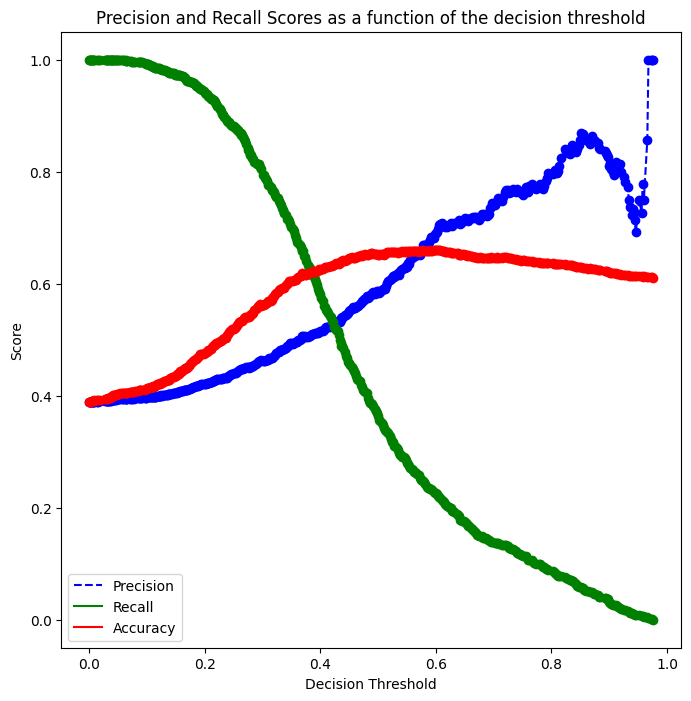

In [22]:
# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results
cross_val_ypred = cross_val_predict(StackingClassifier(estimators=[('ada',model_Ada),('XGB',model_XGB),
 ('GradBoost',model_GradBoost),('RF',model_randomForest), 
 ('Cat',model_cat),('BaggedTree',model_BaggedTree)],
 final_estimator=RandomForestClassifier(n_estimators=500, max_features=1,
                                        random_state=1,oob_score=True),n_jobs=-1,
                                        cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)), X_train,y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)


Accuracy:  66.3109756097561
ROC-AUC:  0.6687160062160062
Precision:  0.7010309278350515
Recall:  0.26153846153846155


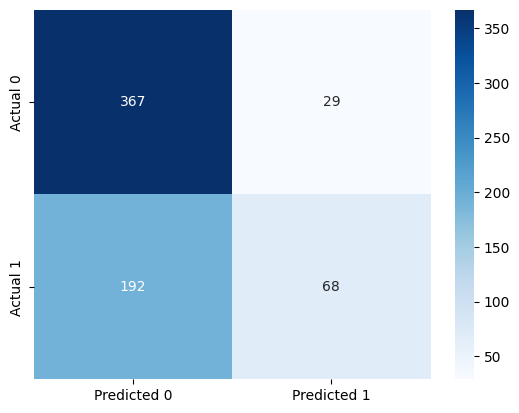

In [26]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.58

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [27]:
meta_X = model.predict_meta_features(X_train)

AttributeError: ignored